<a href="https://colab.research.google.com/github/Harsh813203/Spark-Foundation-Tasks/blob/master/SparkFoundation(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation** **(Task 1)**
Name:- **Harsh Kumar**

**Task 1**

Problem statement:  Predict the percentage of marks of an student based on the number of study hours. What will be predicted score if a student studies for 9.25 hrs/ day?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df= pd.read_csv('/content/student_scores - student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


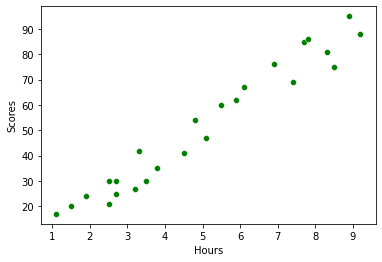

In [14]:
sns.scatterplot(score['Hours'],score['Scores'],color='green')
plt.show()

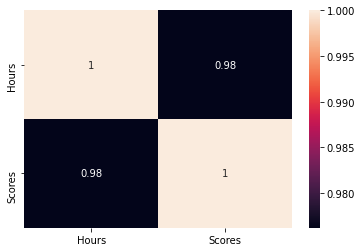

In [9]:
sns.heatmap(score.corr(),annot=True)

Above Visualization showing us that when no.of hour increases then student perform well and get good score. score and hour increases respectively.
Heat map has cleared my doubt and we can see correlation with two variable.


Now we use regression algortihm of machine learning to find continous value for prediction score according to hour.

Now Splitting the dataset into training and testing data

In [82]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

After this now we use our simple linear regression model for prediction

Machine Learning Algorithm

In [47]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_predict= lr.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Now the Visualize the training set results**

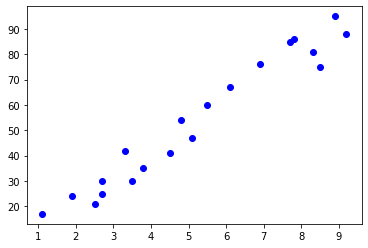

In [51]:
plt.scatter(X_train,y_train,color='blue')

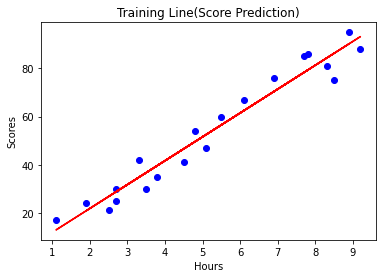

In [55]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title('Training Line(Score Prediction)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Visualize the testing result**

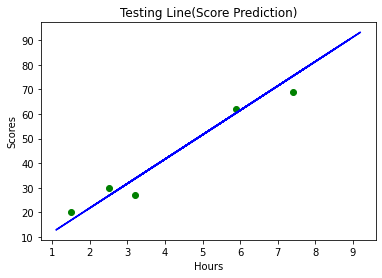

In [56]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title('Testing Line(Score Prediction)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Predicting the score of a given hour=9.25

In [64]:
my_score = np.array(9.25)
my_score = my_score.reshape(1, -1)

predict_score = lr.predict(my_score)
print("Predicted Score for 9.25 hrs of study : ",predict_score[0])

Predicted Score for 9.25 hrs of study :  93.69173248737539


**Calcualting the Residuals**

In [73]:
from sklearn import  metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict))
print('MSE:',metrics.mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))



MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373


**Check accuracy of model**

In [81]:
acc = metrics.r2_score(y_test,y_predict)
print("Accuracy of a model is: ", acc*100)

Accuracy of a model is:  94.54906892105353
